In [113]:
import numpy as np
import pandas as pd
import artm # https://bigartm.readthedocs.io/en/v0.8.0/installation/index.html
import pymorphy2 #https://pymorphy2.readthedocs.io/en/latest/user/guide.html#id2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import gc
import re

# Data Load

In [2]:
%%time
data = pd.read_csv('../../data/news_lenta.csv')

CPU times: user 20.8 s, sys: 2.58 s, total: 23.4 s
Wall time: 25.3 s


In [3]:
data.head(10)

,tags,text,title,topic,url
0,Бокс и ММА,"Украинский боксер Александр Усик рассказал, чт...",Усик поделился планами на будущее после победы...,Спорт,https://lenta.ru/news/2018/07/22/usik_plany/
1,Политика,Израиль эвакуировал из Сирии активистов «Белых...,Израиль вывез из Сирии членов «Белых касок» по...,Мир,https://lenta.ru/news/2018/07/22/evacuation/
2,Футбол,Лондонский «Челси» отказался продать мадридско...,«Челси» отказался продать футболиста «Реалу» з...,Спорт,https://lenta.ru/news/2018/07/22/hazard_real/
3,Бокс и ММА,Вице-президент Федерации профессионального бок...,Слова Порошенко о победе Усика сочли идиотизмом,Спорт,https://lenta.ru/news/2018/07/22/otvet/
4,Музыка,Журнал Billboard опубликовал рейтинг самых выс...,Названы самые богатые музыканты,Культура,https://lenta.ru/news/2018/07/22/moneyrich/
5,ТВ и радио,Бывшего участника сборной команды Актобе КВН Д...,В Казахстане после удара ножом умер игрок КВН,Интернет и СМИ,https://lenta.ru/news/2018/07/22/kvn/
6,Политика,Великобритания откажется от выплат отступных Е...,Британия пригрозила отказаться от выплат Еврос...,Мир,https://lenta.ru/news/2018/07/22/otstupnie/
7,Зимние виды,Талисманы Олимпийских и Паралимпийских игр в Т...,Талисманом Олимпиады-2020 в Токио стало «Вечно...,Спорт,https://lenta.ru/news/2018/07/22/miraitova/
8,Конфликты,Около российской базы Хмеймим в Сирии произошл...,Российскую базу в Сирии дважды атаковали беспи...,Мир,https://lenta.ru/news/2018/07/22/fire/
9,Бокс и ММА,Президент Украины Петр Порошенко поздравил бок...,Порошенко назвал боксера Усика символом борьбы...,Спорт,https://lenta.ru/news/2018/07/22/poro_usik/


In [4]:
data.tail()

,tags,text,title,topic,url
699772,Все,Сегодня областной центр Сахалина и Курил получ...,Южно-Сахалинск объявлен очагом холеры,Россия,https://lenta.ru/news/1999/08/31/cholera/
699773,Все,Намеченная на сегодняшний день церемония вступ...,Карачаево-Черкесия раскололась по национальном...,Россия,https://lenta.ru/news/1999/08/31/karachaevo/
699774,Все,Сегодня утром в районах дагестанских селений Ч...,В горах Дагестана идут активные боевые действия,Россия,https://lenta.ru/news/1999/08/31/dagestan/
699775,Все,На состоявшейся сегодня в Москве пресс-конфере...,Коржаков готов рассказать Генпрокуратуре про ф...,Россия,https://lenta.ru/news/1999/08/31/korzhakov/
699776,Все,15 представителей национал-большевистской парт...,Российские национал-большевики убирают террито...,Мир,https://lenta.ru/news/1999/08/31/limonov/


Видно, что ссылки не совпадают со статьями, но примерно рядом с ними.

# Preprocess
## Get dates

In [5]:
r = re.compile('(\d{4})/(\d{2})/(\d{2})')
r.findall('https://lenta.ru/news/1999/08/31/cholera/')

<>:1: DeprecationWarning: invalid escape sequence \d


[('1999', '08', '31')]

In [6]:
data['date_raw'] = data['url'].apply(r.findall)

In [7]:
data.head()

,tags,text,title,topic,url,date_raw
0,Бокс и ММА,"Украинский боксер Александр Усик рассказал, чт...",Усик поделился планами на будущее после победы...,Спорт,https://lenta.ru/news/2018/07/22/usik_plany/,"[(2018, 07, 22)]"
1,Политика,Израиль эвакуировал из Сирии активистов «Белых...,Израиль вывез из Сирии членов «Белых касок» по...,Мир,https://lenta.ru/news/2018/07/22/evacuation/,"[(2018, 07, 22)]"
2,Футбол,Лондонский «Челси» отказался продать мадридско...,«Челси» отказался продать футболиста «Реалу» з...,Спорт,https://lenta.ru/news/2018/07/22/hazard_real/,"[(2018, 07, 22)]"
3,Бокс и ММА,Вице-президент Федерации профессионального бок...,Слова Порошенко о победе Усика сочли идиотизмом,Спорт,https://lenta.ru/news/2018/07/22/otvet/,"[(2018, 07, 22)]"
4,Музыка,Журнал Billboard опубликовал рейтинг самых выс...,Названы самые богатые музыканты,Культура,https://lenta.ru/news/2018/07/22/moneyrich/,"[(2018, 07, 22)]"


In [8]:
data.shape

(699777, 6)

Точнее, чем за месяц нам не нужно.

In [9]:
data['year'] = data['date_raw'].apply(lambda x: int(x[0][0]))
data['month'] = data['date_raw'].apply(lambda x: int(x[0][1]))

In [10]:
data.head()

,tags,text,title,topic,url,date_raw,year,month
0,Бокс и ММА,"Украинский боксер Александр Усик рассказал, чт...",Усик поделился планами на будущее после победы...,Спорт,https://lenta.ru/news/2018/07/22/usik_plany/,"[(2018, 07, 22)]",2018,7
1,Политика,Израиль эвакуировал из Сирии активистов «Белых...,Израиль вывез из Сирии членов «Белых касок» по...,Мир,https://lenta.ru/news/2018/07/22/evacuation/,"[(2018, 07, 22)]",2018,7
2,Футбол,Лондонский «Челси» отказался продать мадридско...,«Челси» отказался продать футболиста «Реалу» з...,Спорт,https://lenta.ru/news/2018/07/22/hazard_real/,"[(2018, 07, 22)]",2018,7
3,Бокс и ММА,Вице-президент Федерации профессионального бок...,Слова Порошенко о победе Усика сочли идиотизмом,Спорт,https://lenta.ru/news/2018/07/22/otvet/,"[(2018, 07, 22)]",2018,7
4,Музыка,Журнал Billboard опубликовал рейтинг самых выс...,Названы самые богатые музыканты,Культура,https://lenta.ru/news/2018/07/22/moneyrich/,"[(2018, 07, 22)]",2018,7


## Normalize

In [11]:
retoken = re.compile(r'[\'\w]+')
cache = {}
morph = pymorphy2.MorphAnalyzer()

def norm(word):
    '''normalize with caching'''
    if word in cache:
        return cache[word]
    nw = cache[word] = morph.parse(word)[0].normal_form
    return str(nw)

def tokenize_normalize(text):
    '''strip text to words then normalize it'''
    text = retoken.findall(text.lower())
    text = [norm(x) for x in text]
    return text

TODO: Выбрать лучший лемматизатор для нашей задачи.

In [12]:
%%time
data['lemmatized_text'] = data['text'].apply(tokenize_normalize)

CPU times: user 3min 13s, sys: 2.55 s, total: 3min 16s
Wall time: 3min 20s


In [13]:
data.head()

,tags,text,title,topic,url,date_raw,year,month,lemmatized_text
0,Бокс и ММА,"Украинский боксер Александр Усик рассказал, чт...",Усик поделился планами на будущее после победы...,Спорт,https://lenta.ru/news/2018/07/22/usik_plany/,"[(2018, 07, 22)]",2018,7,"[украинский, боксёр, александр, усик, рассказа..."
1,Политика,Израиль эвакуировал из Сирии активистов «Белых...,Израиль вывез из Сирии членов «Белых касок» по...,Мир,https://lenta.ru/news/2018/07/22/evacuation/,"[(2018, 07, 22)]",2018,7,"[израиль, эвакуировать, из, сирия, активист, б..."
2,Футбол,Лондонский «Челси» отказался продать мадридско...,«Челси» отказался продать футболиста «Реалу» з...,Спорт,https://lenta.ru/news/2018/07/22/hazard_real/,"[(2018, 07, 22)]",2018,7,"[лондонский, челси, отказаться, продать, мадри..."
3,Бокс и ММА,Вице-президент Федерации профессионального бок...,Слова Порошенко о победе Усика сочли идиотизмом,Спорт,https://lenta.ru/news/2018/07/22/otvet/,"[(2018, 07, 22)]",2018,7,"[вица, президент, федерация, профессиональный,..."
4,Музыка,Журнал Billboard опубликовал рейтинг самых выс...,Названы самые богатые музыканты,Культура,https://lenta.ru/news/2018/07/22/moneyrich/,"[(2018, 07, 22)]",2018,7,"[журнал, billboard, опубликовать, рейтинг, сам..."


In [14]:
# В будущем будем делать join матрицы тем с документами
data['docID'] = list(range(data.shape[0]))

In [15]:
data.head()

,tags,text,title,topic,url,date_raw,year,month,lemmatized_text,docID
0,Бокс и ММА,"Украинский боксер Александр Усик рассказал, чт...",Усик поделился планами на будущее после победы...,Спорт,https://lenta.ru/news/2018/07/22/usik_plany/,"[(2018, 07, 22)]",2018,7,"[украинский, боксёр, александр, усик, рассказа...",0
1,Политика,Израиль эвакуировал из Сирии активистов «Белых...,Израиль вывез из Сирии членов «Белых касок» по...,Мир,https://lenta.ru/news/2018/07/22/evacuation/,"[(2018, 07, 22)]",2018,7,"[израиль, эвакуировать, из, сирия, активист, б...",1
2,Футбол,Лондонский «Челси» отказался продать мадридско...,«Челси» отказался продать футболиста «Реалу» з...,Спорт,https://lenta.ru/news/2018/07/22/hazard_real/,"[(2018, 07, 22)]",2018,7,"[лондонский, челси, отказаться, продать, мадри...",2
3,Бокс и ММА,Вице-президент Федерации профессионального бок...,Слова Порошенко о победе Усика сочли идиотизмом,Спорт,https://lenta.ru/news/2018/07/22/otvet/,"[(2018, 07, 22)]",2018,7,"[вица, президент, федерация, профессиональный,...",3
4,Музыка,Журнал Billboard опубликовал рейтинг самых выс...,Названы самые богатые музыканты,Культура,https://lenta.ru/news/2018/07/22/moneyrich/,"[(2018, 07, 22)]",2018,7,"[журнал, billboard, опубликовать, рейтинг, сам...",4


# BigARTM

## Prepare for BigARTM input

In [16]:
vwpath = 'data/lenta.vw'

In [17]:
%%time
with open(vwpath, 'w') as fp:
    for text, did in data[['lemmatized_text', 'docID']].values:
        fp.write('{} |default {}\n'.format(did, ' '.join(text)))

CPU times: user 10.6 s, sys: 834 ms, total: 11.4 s
Wall time: 12 s


Записали исходный файл для bigARTM, дальше нам не нужен исходный датафрейм в памяти

In [18]:
data.to_csv('../../data/processed_lenta.csv.gz', compression='gzip', index=False)

In [19]:
# Будем джоинить даты по docID с полученной матрицей тем
id_date = data[['docID', 'year', 'month']].copy()
del data
gc.collect()

0

Собираем батчи и собираем словарь

In [20]:
batches_path = 'data/batches'

In [21]:
%%time
batch_vectorizer = artm.BatchVectorizer(data_path=vwpath,
                                        data_format='vowpal_wabbit',
                                        target_folder=batches_path)

CPU times: user 7min 41s, sys: 17.2 s, total: 7min 58s
Wall time: 2min 31s


In [22]:
%%time
dictionary = artm.Dictionary()
dictionary.gather(data_path=batches_path)

CPU times: user 23.1 s, sys: 397 ms, total: 23.5 s
Wall time: 23.5 s


## Init model and fit it

TODO: отобрать число тем.  
TODO: фильтровать словарь по частоте (bigARTM имеет для этого встроенный функционал)  
TODO: покрутить регуляризаторы, попробовать иерархическую модель   
  
Я беру большое число, рассчитывая на то, что актуальными в каждый отдельный момент будут не очень много тем, и при этом можно будет разделить темы отдельных событий.

In [23]:
NUM_TOPICS = 100
model = artm.ARTM(num_topics=NUM_TOPICS, dictionary=dictionary)
model.scores.add(artm.PerplexityScore(name='perplexity_score',
                                      dictionary=dictionary))

In [24]:
%%time
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

CPU times: user 1h 6min 40s, sys: 1min 30s, total: 1h 8min 11s
Wall time: 18min


In [25]:
# В следующий раз можно будет подгрузить готовые батчи, словарь и обученную модель
model.save('model.bin')

## Get topics-words matrix

In [26]:
phi = model.get_phi()

In [27]:
phi.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
гудмунссон,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
d9e,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
лигорать,0.0,0.0,0.0,0.000000e+00,0.0,1.913962e-13,0.0,0.0,1.079711e-09,0.0,...,0.000000e+00,2.423185e-12,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
мзикайис,0.0,0.0,0.0,8.812197e-07,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,...,2.337561e-09,0.000000e+00,0.0,0.0,9.527477e-14,0.0,0.0,2.980043e-15,0.000000e+00,0.000000e+00
невоструев,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,2.834844e-12,7.596951e-16


In [28]:
phi['word'] = phi.index

### Top words in topics

In [29]:
for col in phi.columns:
    if col != 'word':
        print(col)
        print(phi[[col, 'word']].sort_values(by=col, ascending=False)['word'].values[:20])

topic_0
['в' 'не' 'на' 'по' 'что' 'быть' 'и' 'он' 'это' 'который' 'тот' 'зарплата'
 'для' 'слово' 'как' 'о' 'месторождение' 'работник' 'бизнес' 'от']
topic_1
['в' 'украина' 'украинский' 'на' 'и' 'киев' 'турция' 'что' 'это'
 'турецкий' '2014' 'с' 'народный' 'донбасс' 'донецкий' 'быть' 'россия'
 'год' 'заявить' 'территория']
topic_2
['в' 'он' 'что' 'быть' 'который' 'и' 'с' 'снять' 'журналист' 'бывший'
 'генерал' 'свой' 'снятой' 'как' 'по' 'брат' 'березовский' 'слово'
 'утверждать' 'человек']
topic_3
['в' 'год' 'и' 'на' 'он' 'с' 'семья' 'она' 'быть' 'церковь' 'отец' 'дочь'
 'сын' 'жена' 'свой' 'который' 'ii' 'супруг' 'после' 'храм']
topic_4
['министр' 'правительство' 'и' 'россия' 'премьер' 'с' 'в' 'что'
 'экономический' 'на' 'это' 'медведев' 'заявить' 'санкция' 'год'
 'развитие' 'по' 'он' 'президент' 'российский']
topic_5
['в' 'издание' 'газета' 'и' 'год' 'по' 'книга' 'с' 'студент' 'университет'
 'что' 'о' 'алкоголь' 'быть' 'как' 'это' 'напиток' 'журнал' 'а' 'список']
topic_6
['мы' 'и' 'в

['на' 'доллар' 'рубль' 'нефть' 'до' 'курс' 'цена' 'за' 'евро' 'стоимость'
 'к' 'по' 'и' 'с' 'баррель' 'валюта' 'уровень' 'стоить' '1' 'что']
topic_52
['на' 'и' 'станция' 'поезд' 'быть' 'из' 'он' 'что' 'путь'
 'железнодорожный' 'движение' 'парк' 'который' 'с' 'за' 'час' 'к' 'мкс'
 'как' 'время']
topic_53
['в' 'фонд' 'и' 'поддержка' 'образование' 'который' 'человек' 'для' 'с'
 'год' 'что' 'население' 'тот' 'ющенко' 'тысяча' 'президент' 'эстония'
 'быть' 'массовый' 'на']
topic_54
['6' 'в' 'с' 'на' 'и' 'турнир' '4' 'круг' '7' 'один' 'из' 'финал' 'два'
 'мария' '3' 'рейтинг' 'россиянка' 'она' 'австралия' 'который']
topic_55
['в' 'доллар' 'миллион' 'год' 'компания' 'на' 'тысяча' 'и' 'продать' 'за'
 'с' 'продажа' 'фунт' 'мир' 'который' 'крупный' 'аукцион' 'сша' 'самый'
 'американский']
topic_56
['что' 'в' 'не' 'он' 'тот' 'по' 'считать' 'свой' 'то' 'и' 'за' 'с' 'опрос'
 'время' 'на' 'она' 'большой' 'греция' 'но' 'мнение']
topic_57
['в' 'закон' 'и' 'о' 'документ' 'право' 'законопроект' 'внести'

In [30]:
# Дальше нам не нужно хранить эту матрицу в памяти
del phi
gc.collect()

324

## Get topics-docs matrix
### Sparse (memory effective)

In [31]:
theta = model.transform_sparse(batch_vectorizer=batch_vectorizer, eps=0.001)

In [32]:
theta[0].shape

(100, 699777)

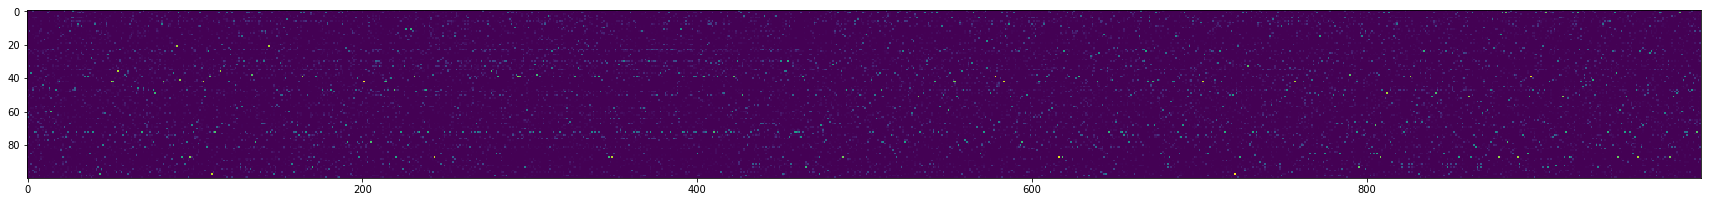

In [33]:
# Можно посмотреть кусок матрицы
plt.figure(figsize=(30, 10))
plt.imshow(theta[0][:, 2000:3000].toarray());

### Dense theta matrix

In [34]:
%%time
theta = model.transform(batch_vectorizer=batch_vectorizer)

CPU times: user 5min 46s, sys: 8.59 s, total: 5min 54s
Wall time: 1min 37s


In [35]:
theta.head()

,18000,18001,18002,18003,18004,18005,18006,18007,18008,18009,...,234990,234991,234992,234993,234994,234995,234996,234997,234998,234999
topic_0,0.000025,1.508390e-05,0.002542,0.000889,0.000736,0.000017,0.000327,3.324432e-05,0.000003,0.000350,...,0.000019,0.008969,0.000304,0.004698,1.372199e-03,0.000694,1.285077e-03,0.000685,0.001611,0.000315
topic_1,0.000048,1.325999e-04,0.000213,0.000117,0.000020,0.079979,0.000172,7.823730e-05,0.000014,0.000003,...,0.000008,0.000314,0.000056,0.000012,3.644162e-05,0.001063,9.998231e-07,0.081898,0.000005,0.000009
topic_2,0.000080,3.244209e-03,0.007461,0.000447,0.001713,0.000057,0.041409,3.778346e-07,0.031482,0.000078,...,0.000058,0.000583,0.000318,0.000014,5.352392e-06,0.000367,3.610033e-02,0.000295,0.000047,0.000098
topic_3,0.000058,3.335275e-04,0.000010,0.000584,0.000021,0.000002,0.000016,3.476192e-02,0.000005,0.000041,...,0.000007,0.000001,0.000014,0.000028,1.692255e-07,0.000006,1.914971e-05,0.285651,0.000004,0.000007
topic_4,0.000285,4.772771e-07,0.037044,0.000216,0.000276,0.000030,0.010470,4.125767e-04,0.000093,0.000105,...,0.003928,0.000132,0.003293,0.000014,5.064514e-05,0.000314,5.758859e-02,0.005686,0.000055,0.000017


In [36]:
theta = theta.T

In [37]:
theta.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
18000,0.000025,0.000048,0.000080,0.000058,2.850795e-04,0.000042,0.000115,0.067055,0.050060,1.098360e-01,...,0.000912,0.000238,0.000044,0.000019,9.752930e-07,0.000005,0.000404,0.005923,0.004107,0.000061
18001,0.000015,0.000133,0.003244,0.000334,4.772771e-07,0.007246,0.000405,0.000002,0.015220,1.587109e-07,...,0.000439,0.000007,0.005580,0.000575,1.553402e-03,0.008293,0.000010,0.000073,0.000001,0.000003
18002,0.002542,0.000213,0.007461,0.000010,3.704431e-02,0.027581,0.008354,0.000030,0.000437,2.706971e-05,...,0.000169,0.000291,0.000114,0.000052,1.880194e-04,0.000142,0.178467,0.000003,0.000007,0.004370
18003,0.000889,0.000117,0.000447,0.000584,2.164570e-04,0.000218,0.012172,0.000087,0.000123,3.148665e-05,...,0.000279,0.000649,0.001813,0.000031,7.342621e-06,0.000504,0.003766,0.000458,0.000121,0.001323
18004,0.000736,0.000020,0.001713,0.000021,2.756495e-04,0.000010,0.023903,0.000001,0.000042,1.639970e-04,...,0.000222,0.000098,0.017980,0.000034,1.553743e-04,0.000149,0.001141,0.000048,0.000001,0.000005


In [38]:
id_date.head()

,docID,year,month
0,0,2018,7
1,1,2018,7
2,2,2018,7
3,3,2018,7
4,4,2018,7


# DataViz
## Prepare Theta matrix

In [39]:
%%time
# прилепим даты к темам
joined = id_date.join(theta)

CPU times: user 978 ms, sys: 320 ms, total: 1.3 s
Wall time: 1.1 s


In [40]:
joined.head()

,docID,year,month,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
0,0,2018,7,2.292091e-03,1.536018e-03,0.000010,1.105144e-07,2.297225e-04,3.189710e-07,5.541183e-02,...,9.874740e-07,0.000011,0.000192,0.000048,7.028788e-06,3.435618e-07,2.773800e-04,0.000070,7.795700e-07,1.119313e-05
1,1,2018,7,5.568954e-05,1.076670e-03,0.000218,3.818408e-02,3.042765e-03,1.103037e-05,2.916181e-03,...,1.157864e-04,0.013592,0.011389,0.000034,2.971390e-06,9.715886e-05,1.163898e-01,0.000068,1.010202e-05,3.039775e-05
2,2,2018,7,4.623061e-02,3.640299e-07,0.000028,4.478671e-03,2.807078e-05,6.810810e-04,9.559025e-04,...,9.732322e-05,0.000020,0.000011,0.012348,1.779136e-06,3.296326e-02,1.099646e-06,0.000039,7.430692e-07,1.461042e-06
3,3,2018,7,2.346494e-05,6.497360e-02,0.000018,1.882594e-07,1.614846e-03,6.400606e-07,8.268812e-02,...,7.804295e-06,0.000003,0.000007,0.002758,1.140301e-07,1.536834e-07,2.487328e-04,0.000024,4.221312e-08,7.889803e-03
4,4,2018,7,2.101389e-07,1.042967e-07,0.000002,1.079359e-06,8.772184e-08,2.838917e-02,5.029150e-07,...,1.146560e-06,0.000004,0.000285,0.000006,3.756423e-08,1.108554e-04,6.345096e-08,0.010089,2.099313e-07,2.437189e-08


In [41]:
topics = ['topic_{}'.format(i) for i in range(NUM_TOPICS)]
gb = joined.groupby(['year', 'month'])[topics].sum()

In [42]:
gb.head()

topic_0   topic_1   topic_2   topic_3    topic_4   topic_5  \
year month                                                                
1914 9      0.003619  0.032956  0.081685  0.047819   0.021276  0.015205   
1999 8      0.032480  0.097641  0.220590  0.354445   0.387318  0.055543   
     9      5.411963  1.714344  5.207315  3.589842  12.725292  2.428382   
     10     9.008795  1.956184  4.676548  2.992725  15.295964  3.620312   
     11     9.213717  3.465359  5.853778  4.895299  20.692516  5.422632   

              topic_6    topic_7    topic_8   topic_9    ...     topic_90  \
year month                                               ...                
1914 9       0.389977   0.419654   0.000197  0.000256    ...     0.044227   
1999 8       0.413358   0.694531   0.195595  0.437570    ...     0.004776   
     9      13.111959  14.126107  10.088093  6.042733    ...     2.902919   
     10     11.083038  14.114563  13.258200  5.307898    ...     5.274312   
     11     13.424805  15.126789  12.687481  6.177958    ...     3.928777   

            topic_91   topic_92  topic_93  topic_94  topic_95   topic_96  \
year month                                                                 
1914 9      0.000048   0.048570  0.003548  0.056778  0.000092   0.001505   
1999 8      0.007243   0.092681  0.029006  0.070305  0.064368   0.983362   
     9      2.564243   5.990418  0.540323  4.177093  3.195774   9.199347   
     10     2.702684   7.877185  1.106659  4.224394  5.841819   8.709975   
     11     2.004509  10.239501  1.056810  7.202655  5.691562  11.756114   

            topic_97   topic_98  topic_99  
year month                                 
1914 9      0.052455   0.021438   0.00018  
1999 8      0.133571   0.204588   0.32514  
     9      4.166539   7.672719   6.60327  
     10     3.728466   7.509107   7.56270  
     11     4.550507  10.649076  10.97177  

[5 rows x 100 columns]

In [43]:
gb.shape

(229, 100)

In [48]:
joined = joined.set_index(['year','month','docID'])

In [54]:
top = joined.idxmax(axis=1).rename('topic')

In [55]:
top 

year  month  docID 
2018  7      0         topic_21
             1          topic_7
             2         topic_72
             3         topic_21
             4         topic_41
             5         topic_30
             6         topic_38
             7         topic_93
             8         topic_31
             9         topic_21
             10        topic_12
             11         topic_8
             12        topic_21
             13        topic_22
             14        topic_81
             15        topic_22
             16        topic_47
             17        topic_47
             18        topic_85
             19        topic_21
             20        topic_31
             21        topic_22
             22        topic_72
             23        topic_37
             24        topic_72
             25        topic_36
             26        topic_41
             27        topic_91
             28         topic_9
             29        topic_90
                    

In [79]:
t = (top
 .reset_index(level='docID')
 .set_index('topic',append=True)
).groupby(level=[0,1,2]).size()
t

year  month  topic   
1914  9      topic_48      1
             topic_6       1
             topic_61      1
             topic_7       1
             topic_75      1
1999  8      topic_28      2
             topic_3       1
             topic_35      1
             topic_37      1
             topic_4       1
             topic_50      1
             topic_52      1
             topic_57      2
             topic_60      1
             topic_7       1
             topic_78      1
             topic_79      1
             topic_9       1
             topic_96      1
             topic_99      1
      9      topic_0       3
             topic_1       1
             topic_10      4
             topic_11      9
             topic_12      2
             topic_13      2
             topic_14      3
             topic_15      7
             topic_16     10
             topic_18      4
                        ... 
2018  7      topic_71      2
             topic_72    197
             topic_73

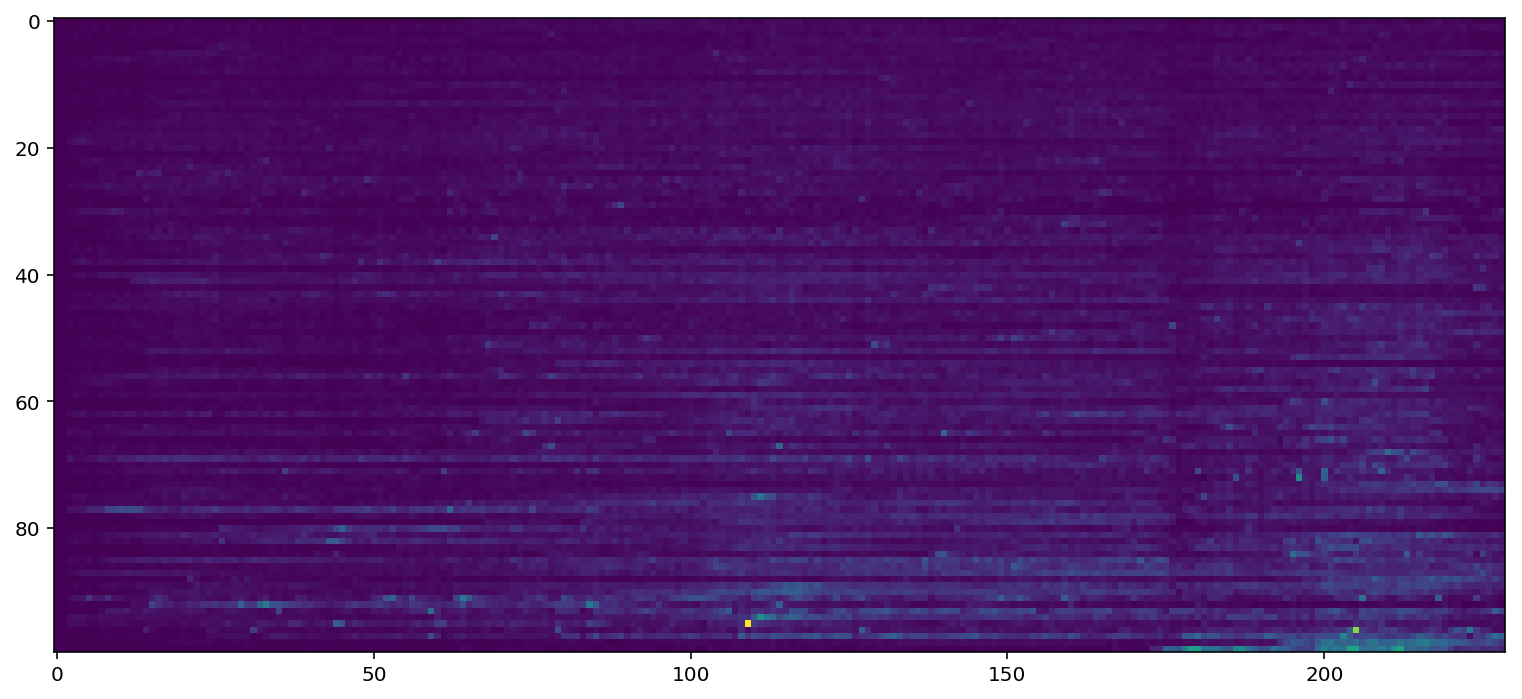

In [117]:
tt =t.unstack('topic',fill_value=0).T

plt.figure(figsize=(13, 10))
plt.imshow(tt.reindex(tt.std(axis=1).sort_values().index));

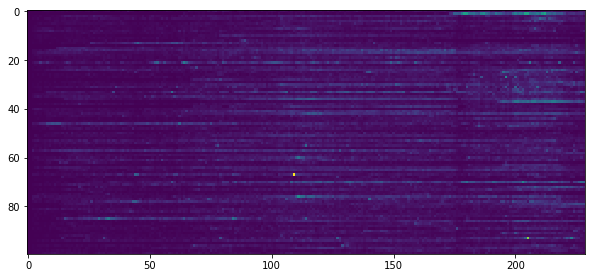

In [82]:


plt.figure(figsize=(10, 20))
plt.imshow(t.unstack('topic',fill_value=0).T);

In [218]:
t2 =t.index.to_frame(index = False)
data = pd.DataFrame(dict(
    date = pd.to_datetime(t2[['year','month']].assign(day=1)),
    topic = t2.topic,
    mentions = t.values

    

))
#pd.DataFrame([data[data.mentions>=i].topic.nunique() for i in range(data.mentions.max())]).plot() 
dd  = data.pivot_table(index='date',columns='topic',values='mentions')
dd_total = dd.sum(axis=1)
dd_topic_list = dd.sum(axis=0).sort_values(ascending=False)[:20].index
dd = dd[dd_topic_list]
dd = pd.DataFrame(dict(
 part = dd.divide(dd_total,axis =0).stack(),
 mentions = dd .stack()
)).reset_index()

dd.sample(5)

,date,topic,part,mentions
1993,2008-01-01,topic_64,0.019374,60.0
3980,2016-05-01,topic_60,0.007266,35.0
1876,2007-08-01,topic_72,0.026540,78.0
1522,2006-02-01,topic_47,0.015926,48.0
1873,2007-07-01,topic_64,0.021307,59.0


In [184]:
dd= (data[~data.topic.isin(data.groupby('topic').mentions.sum().sort_values(ascending=False)[:20].index)]
  .groupby('date')
  .mentions.sum()
  .reset_index()
  .assign(topic='other')
  .append(dd,sort=False)
  .query("date > '2000'")
 )
    

In [230]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [251]:
ddt = dd_total.rename('total')['2000-01-01':].reset_index() 
ddt.sample(5)

,date,total
217,2018-02-01,3358.0
174,2014-07-01,3203.0
170,2014-03-01,2396.0
11,2000-12-01,1794.0
147,2012-04-01,3731.0


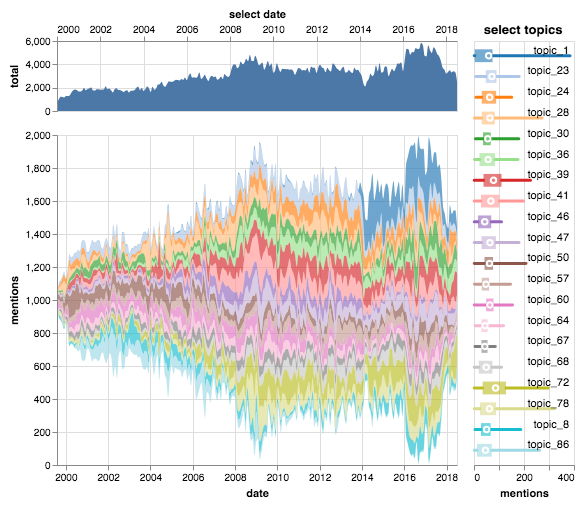

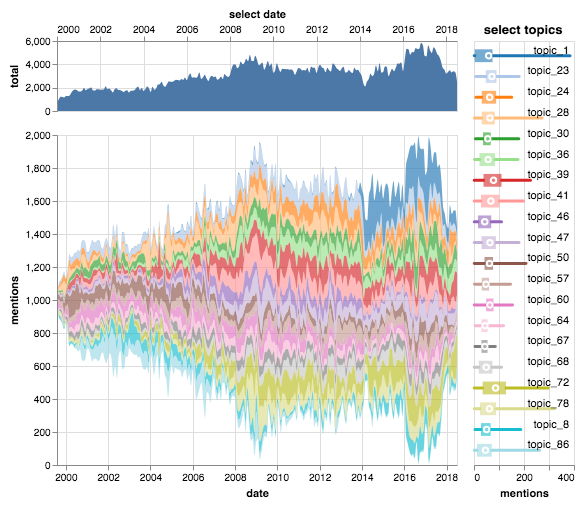

In [406]:
import altair as alt

single = alt.selection_single(
    empty="none", nearest=False, on="mouseover", fields=["topic"]
)

date_sel = alt.selection_interval(encodings=["x"], empty="all", fields=["date"])
color_scale = alt.Color("topic:N", scale=alt.Scale(scheme="category20"), legend=None)
y_encoding = alt.Y(
    "topic:N",
    axis=None,
    sort=alt.EncodingSortField(field="ment_sum", op="mean"),
    scale=alt.Scale(paddingOuter=0.4, paddingInner=0.382),
)
sel_topics = alt.selection_interval(encodings=["y"], empty="all", fields=["topic"])

chart = alt.hconcat(

        alt.vconcat(
            alt.Chart(ddt, height=70)
            .mark_area(interpolate="monotone")
            .encode(
                x=alt.X("date:T",axis=alt.Axis( orient="top"),title = "select date"),
                y=alt.Y("total:Q", stack="center",)
                # color = alt.Color('topic:N',scale=alt.Scale(scheme='category20',)), # category20b redyellowblue
                # opacity = alt.condition(single,alt.value(1.),alt.value(.65))
            )
            .add_selection(date_sel)
            ,
            
            alt.Chart(dd, height=330)
            .mark_area(interpolate="monotone")
            .encode(
                x=alt.X("date:T"),
                y=alt.Y("mentions:Q", stack="center"),
                color=alt.Color(
                    "topic:N", scale=alt.Scale(scheme="category20"), legend=None,
                ),  # category20b redyellowblue
                opacity=alt.condition(single, alt.value(1.0), alt.value(0.65)),
            )
            .transform_filter(sel_topics)
            .transform_filter(date_sel)
            .add_selection(single)
            
        )
    ,
        alt.layer(
            alt.layer(
                    alt.Chart()
                    .mark_bar(cornerRadius=5)
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_q1:Q", title="mentions"),
                        x2=alt.X("ment_q3:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(1.0), alt.value(0.6)
                        ),
                    )
                    .add_selection(sel_topics)
                ,
                    alt.Chart()
                    .mark_rule(size=3, strokeCap="round")
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_min:Q"),
                        x2=alt.X("ment_q1:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(.6), alt.value(1.)
                        ),
                    )
                ,
                    alt.Chart()
                    .mark_rule(size=3, strokeCap="round")
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_q3:Q"),
                        x2=alt.X("ment_max:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(.6), alt.value(1.)
                        ),
                    ).add_selection(single)
                ,
                    alt.Chart()
                    .mark_point(color="white", opacity=1.0)
                    .encode(y=y_encoding, x=alt.X("ment_mean:Q"))
                ,

            )
            ,
                alt.Chart()
                .mark_text(opacity=1.0, align="right", dx=-5, baseline="bottom")
                .encode(
                    y=y_encoding,
                    text="topic:N",
                    x=alt.X("text_pos:Q", scale=alt.Scale(domain=[0,1],zero=True),axis=None)  # alt.value(0)
                    # x=alt.X( 'ment_q3:Q'),
                )
                .transform_calculate(text_pos="1"),
            
            data=dd,
            width =100,
            height = 424,
            title ="select topics"
        )
        .resolve_scale(y="shared",x="independent")
        .transform_aggregate(
            ment_q1="q1(mentions):Q",
            ment_q3="q3(mentions):Q",
            ment_min="min(mentions):Q",
            ment_max="max(mentions):Q",
            ment_sum="sum(mentions):Q",
            ment_mean="mean(mentions):Q",
            groupby=["topic"],
        )
    
)
chart

In [404]:
chart.save('first.html')

In [407]:
phi = model.get_phi()

In [481]:

df_words = pd.concat([
phi[col]
 .sort_values(ascending = False)[:30]
 .reset_index()
 .rename(columns={"index":"word",col:"factor"})
 .assign(topic = col ) for col in phi.columns
    
])
df_words.sample(5)

,word,factor,topic
6,мир,0.016048,topic_70
24,заведение,0.007051,topic_26
29,изъять,0.004762,topic_67
5,следственный,0.020062,topic_12
6,россия,0.014070,topic_93


In [482]:
df_topic_names =( 
 df_words
    .groupby('topic')
    .apply(
        lambda g,w:
          "_".join(g[~g.word.isin(w[w.topic!=g.topic[0]].word)].word[:2].tolist()),
        w =df_words.sort_values('word')
    )
    .rename('keywords')
    .reset_index()
)
df_topic_names.sample(5)

,topic,keywords
53,topic_57,закон_документ
43,topic_48,смерть_тело
37,topic_42,одежда_бренд
91,topic_91,авиакомпания_рейс
33,topic_39,й_очки


In [483]:
import re
re_num = re.compile(r"\d+$")
topic_ids = {t:int(re_num.findall(t)[0]) for t in df_topic_names.topic.unique()}

In [484]:
df_topic_names['topic']=df_topic_names.topic.replace( topic_ids)
df_words['topic']=df_words.topic.replace( topic_ids)

In [485]:
df_docs = dd
df_docs['topic']=df_docs.topic.replace( topic_ids)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [486]:
df_totals =  ddt

In [524]:
df_words['word'] = df_words.word.str.upper()

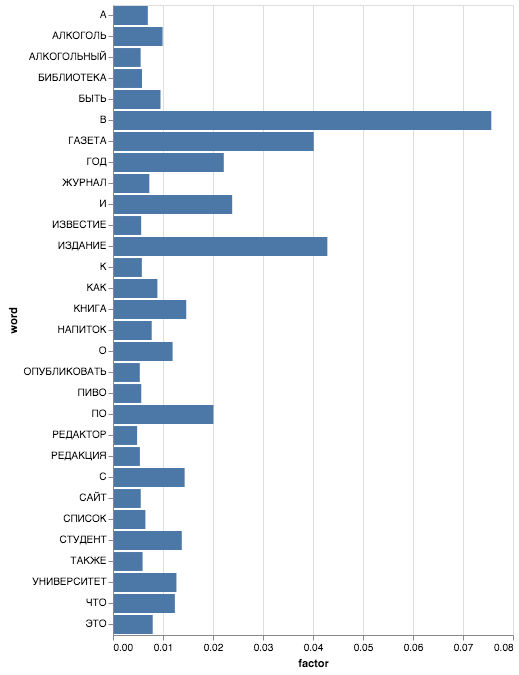

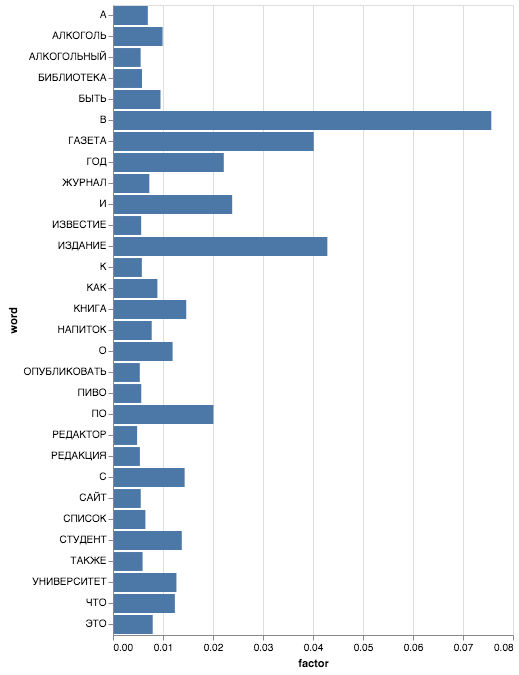

In [527]:
(
    alt.Chart(df_words[df_words.topic==5].sort_values('factor',ascending=False))
    .mark_bar()
    .encode(
        x = "factor:Q",
        y = "word:N"
    
    )
    .transform_filter(
        'datum.topic==5'
    )
)

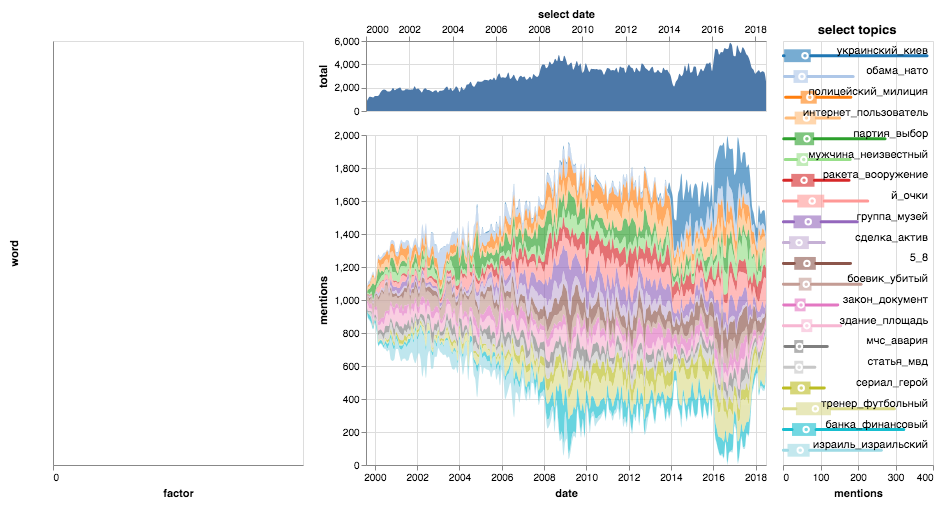

In [531]:
import altair as alt

single = alt.selection_single(
    empty="none", nearest=False, on="mouseover", fields=["topic"]
)

date_sel = alt.selection_interval(encodings=["x"], empty="all")
color_scale = alt.Color("topic:N", scale=alt.Scale(scheme="category20"), legend=None)
y_encoding = alt.Y(
    "topic:N",
    axis=None,
    sort=alt.EncodingSortField(field="ment_sum", op="mean"),
    scale=alt.Scale(paddingOuter=0.4, paddingInner=0.382),
)
sel_topics = alt.selection_interval(encodings=["y"], empty="all")

chart = alt.hconcat(
    
        alt.Chart(df_words.sort_values('factor',ascending=False),width = 250,height = 424)
        .mark_bar()
        .encode(
            x = "factor:Q",
            y = "word:N"

        )
        .transform_filter(single)
    ,

        alt.vconcat(
            alt.Chart(df_totals, height=70)
            .mark_area(interpolate="monotone")
            .encode(
                x=alt.X("date:T",axis=alt.Axis( orient="top"),title = "select date"),
                y=alt.Y("total:Q", stack="center",)
                # color = alt.Color('topic:N',scale=alt.Scale(scheme='category20',)), # category20b redyellowblue
                # opacity = alt.condition(single,alt.value(1.),alt.value(.65))
            )
            .add_selection(date_sel)
            ,
            
            alt.Chart( height=330)
            .mark_area(interpolate="monotone")
            .encode(
                x=alt.X("date:T"),
                y=alt.Y("mentions:Q", stack="center"),
                color=alt.Color(
                    "topic:N", scale=alt.Scale(scheme="category20"), legend=None,
                ),  # category20b redyellowblue
                opacity=alt.condition(single, alt.value(1.0), alt.value(0.65)),
            )
            .transform_filter(sel_topics)
            .transform_filter(date_sel)
            .add_selection(single)
            
        )
    ,
        alt.layer(
            alt.layer(
                    alt.Chart()
                    .mark_bar(cornerRadius=5)
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_q1:Q", title="mentions"),
                        x2=alt.X("ment_q3:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(1.0), alt.value(0.6)
                        ),
                    )
                    .add_selection(sel_topics)
                ,
                    alt.Chart()
                    .mark_rule(size=3, strokeCap="round")
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_min:Q"),
                        x2=alt.X("ment_q1:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(.6), alt.value(1.)
                        ),
                    )
                ,
                    alt.Chart()
                    .mark_rule(size=3, strokeCap="round")
                    .encode(
                        y=y_encoding,
                        x=alt.X("ment_q3:Q"),
                        x2=alt.X("ment_max:Q"),
                        color=color_scale,
                        opacity=alt.condition(
                            single, alt.value(.6), alt.value(1.)
                        ),
                    ).add_selection(single)
                ,
                    alt.Chart()
                    .mark_point(color="white", opacity=1.0)
                    .encode(y=y_encoding, x=alt.X("ment_mean:Q"))
                ,

            )
            ,
                alt.Chart()
                .mark_text(opacity=1.0, align="right", dx=-5, baseline="bottom")
                .encode(
                    y=y_encoding,
                    text="keywords:N",
                    x=alt.X("text_pos:Q", scale=alt.Scale(domain=[0,1],zero=True),axis=None)  # alt.value(0)
                    # x=alt.X( 'ment_q3:Q'),
                )
                .transform_calculate(text_pos="1")
                .transform_lookup(
                    lookup='topic',
                    from_=alt.LookupData(data=df_topic_names, key='topic',
                                         fields=['keywords'])
                )
            ,


            width =150,
            height = 424,
            title ="select topics"
        )
        .resolve_scale(y="shared",x="independent")
        .transform_aggregate(
            ment_q1="q1(mentions):Q",
            ment_q3="q3(mentions):Q",
            ment_min="min(mentions):Q",
            ment_max="max(mentions):Q",
            ment_sum="sum(mentions):Q",
            ment_mean="mean(mentions):Q",
            groupby=["topic"],
        )
    ,
    data=df_docs,
    
)
chart

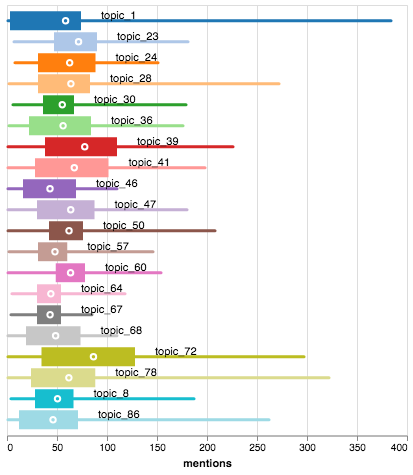

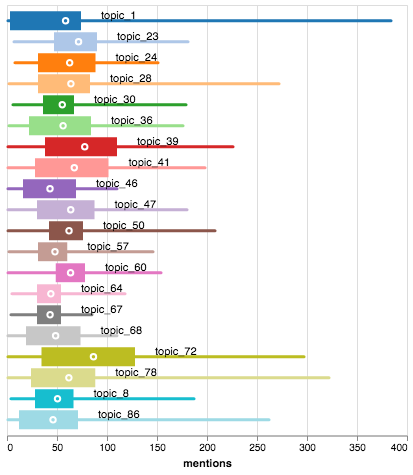

In [336]:
color_scale = alt.Color('topic:N',scale=alt.Scale(scheme='category20', ),legend=None)
y_encoding =alt.Y('topic:N', axis=None,
                  sort=alt.EncodingSortField(field='ment_sum', op='mean'),
                  scale=alt.Scale(paddingOuter=.3))
sel_topics = alt.selection_interval(
            encodings=['y'],
            empty='all',
            fields=['topic'])
alt.layer (
    alt.Chart()
    .mark_bar(
        cornerRadius = 5
    )
    .encode(
        y=y_encoding,
        x=alt.X( 'ment_q1:Q',title='mentions'),
        x2 =alt.X( 'ment_q3:Q'),
        color = color_scale,
        opacity = alt.condition(sel_topics,alt.value(1.),alt.value(.6))
    )
    .add_selection (sel_topics)
    ,
    alt.Chart()
    .mark_rule(
        size = 3,
        strokeCap = "round",
)
    .encode(
        y=y_encoding,
        x=alt.X( 'ment_min:Q'),
        x2 =alt.X( 'ment_q1:Q'),
        color = color_scale,
    
    ),
    alt.Chart()
    .mark_rule(
        size = 3,
        strokeCap = "round",
    )
    .encode(
        y=y_encoding,
        x=alt.X( 'ment_q3:Q'),
        x2 =alt.X( 'ment_max:Q'), 
       color = color_scale, 
    ),
    alt.Chart()
    .mark_point(
        color = 'white',
        opacity = 1.
    )
    .encode(
        y=y_encoding,
        x=alt.X( 'ment_mean:Q')
    ),
    alt.Chart()
    .mark_text(
        opacity = 1.,
        align ="left",
        dx =20,
        baseline ="bottom",
    )
    .encode(
        y=y_encoding,
        text ='topic:N',
        #x =alt.value(100)
        x=alt.X( 'ment_q3:Q'),
       
    ),

    data = dd
           
).transform_aggregate(
        ment_q1='q1(mentions):Q',
        ment_q3='q3(mentions):Q',
        ment_min='min(mentions):Q',
        ment_max='max(mentions):Q',
        ment_sum='sum(mentions):Q',
        
        ment_mean='mean(mentions):Q',
        groupby=["topic"]
    )
  

topic,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
date,,,,,,,,,,,,,,,,,,,,,
1914-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1999-09-01,3.0,1.0,4.0,9.0,2.0,2.0,3.0,7.0,10.0,NaN,...,2.0,2.0,2.0,NaN,5.0,1.0,6.0,7.0,3.0,7.0
1999-10-01,7.0,2.0,7.0,6.0,1.0,5.0,9.0,8.0,14.0,3.0,...,3.0,1.0,4.0,NaN,3.0,NaN,3.0,4.0,7.0,7.0
1999-11-01,7.0,NaN,4.0,14.0,5.0,10.0,3.0,14.0,26.0,1.0,...,1.0,1.0,3.0,NaN,8.0,NaN,10.0,4.0,8.0,7.0
1999-12-01,4.0,NaN,8.0,4.0,5.0,13.0,4.0,14.0,29.0,NaN,...,4.0,1.0,1.0,1.0,6.0,1.0,9.0,6.0,6.0,7.0
2000-01-01,9.0,1.0,3.0,4.0,3.0,6.0,1.0,24.0,24.0,4.0,...,2.0,1.0,3.0,1.0,14.0,3.0,9.0,NaN,6.0,14.0
2000-02-01,14.0,1.0,4.0,13.0,2.0,12.0,NaN,24.0,31.0,3.0,...,3.0,2.0,7.0,5.0,8.0,2.0,10.0,5.0,4.0,20.0
2000-03-01,15.0,3.0,5.0,17.0,4.0,9.0,2.0,24.0,34.0,NaN,...,2.0,4.0,8.0,5.0,12.0,2.0,14.0,7.0,12.0,14.0


## Straightforward matrix heatmap

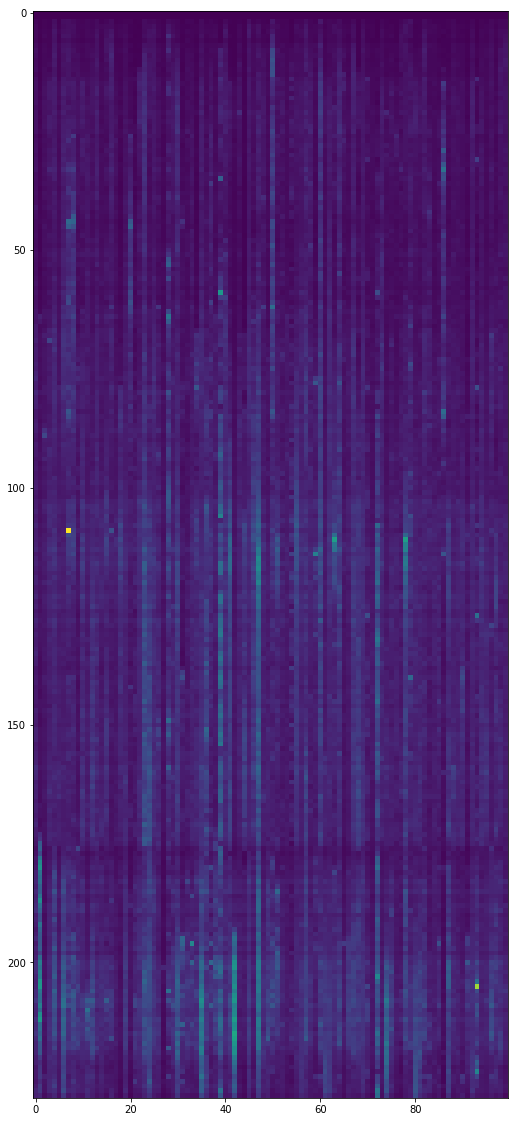

In [44]:
plt.figure(figsize=(10, 20))
plt.imshow(gb[topics]);

## PyGal

PyGal рисует интерактивные svg. В сохранённых ноутбуках этого не видно, но если вы запустите тот же код сами, то можно будет потыкать. Отдельные объекты реагируют на hover, так же можно выделять объекты из легенды.

Можно попробовать как это работает прямо у них в странице с документацией http://www.pygal.org/en/latest/documentation/types/line.html#stacked  

Ещё эта штука работает с flask.

In [45]:
import pygal
from IPython.display import SVG, HTML

ModuleNotFoundError: No module named 'pygal'

In [ ]:
# Эта штука нужна только для того, чтобы в ноутбуке рисовалось
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

Простой путь: взять и отрисовать как есть

In [ ]:
line_chart = pygal.StackedLine(fill=True, show_dots=False)
line_chart.title = 'Topics'
for topic in topics:
    line_chart.add(topic, gb[topic].values)

HTML(html_pygal.format(pygal_render=line_chart.render(is_unicode=True)))

In [ ]:
# Так можно посмотреть большую картинку в отдельной вкладке
line_chart.render_in_browser()

Как мы изначально думали делать шариками не работает при большом количестве тем.

In [ ]:
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.title = 'Topics'

for topic in topics:
    dot_chart.add(topic, gb[topic].values)

HTML(html_pygal.format(pygal_render=dot_chart.render(is_unicode=True)))

In [ ]:
from pygal.style import Style

Если отображать долю, а не абсолютное значение, то становится более читаемо

In [ ]:
s = gb[topics].sum(axis=1)
line_chart = pygal.StackedLine(fill=True, show_dots=False,
                               stroke_style={'width': 0.5},
                               style=Style(legend_font_size=6),
                              legend_at_bottom=True)
line_chart.title = 'Topics'
# line_chart.x_labels = map(str, range(2002, 2013))
for topic in topics:
    line_chart.add(topic, gb[topic].values/s)

HTML(html_pygal.format(pygal_render=line_chart.render(is_unicode=True)))

In [ ]:
line_chart.render_in_browser()

Тем слишком много, и в каждый отдельный момент времени важны только несколько. Давайте попробуем их отфильтровать по значимости.  
TODO: придумать более красивый способ это сделать.

In [ ]:
gb_filtered = gb.copy()

In [ ]:
%%time
gb_filtered[topics] = gb_filtered[topics]\
    .apply(lambda row: row.apply(lambda v: v if v in row.nlargest(10).values else 0), axis=1)

In [ ]:
s = gb_filtered[topics].sum(axis=1)
line_chart = pygal.StackedLine(fill=True, show_dots=False,
                               stroke_style={'width': 0.5},
                               style=Style(legend_font_size=6),
                              legend_at_bottom=True)
line_chart.title = 'Topics'
for topic in topics:
    vals = gb_filtered[topic].values/s
    line_chart.add(topic, vals)

HTML(html_pygal.format(pygal_render=line_chart.render(is_unicode=True)))

In [ ]:
line_chart.render_in_browser()